#### Sevgili bağlantılarım,
---
 * Öncelikle bu proje sürecinde K-Nearest Neighbors (K-En yakın komşu) algoritması ile ilgili literatür taraması yapılarak çalışmaya başlanmış ve elde edilen bulgular sentezlenerek entegre biçimde proje içerisinde kullanılmıştır. Veri setlerinin %50'si makine öğrenmesi modeli train data olarak için kullanılmış, geriye kalan %50 veri ise test data olarak kullanılmıştır. %50 Train veri ile test sonucunda %75 doğruluk oranı elde edilmiştir. (7-En Yakın Komşu için)... Proje içerisinde aşama aşama yorum satırları eklenmiştir. Yararlı bir çalışma olması dileğiyle... 
 
 Herkese iyi çalışmalar, kolaylıklar dilerim...
 
**Tarık Kaan Koç**

**Linkedin:** https://www.linkedin.com/in/tarikkaankoc/

## Şeker Hastalığı Teşhisi Projesi

---
### Kullanılan Veri Seti Hakkında: 

* Kullanılan veri seti kaggle.com platformundan alınmıştır. Veri setinin amacı, veri setinde yer alan belirli tanısal ölçümlere dayanarak bir hastanın diyabetli olup, olmadığını tanısal olarak tahmin etmektir. Veri setinde bulunan veriler hindistanda bulunan 5 farklı hastaneden alınmıştır. Tam olarak 768 pima kızılderili mirasına sahip ve en az 21 yaşından oluşan kadınlardan oluşmaktadır. 



---

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# STEP-1 : Veri setini okumak
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
# Step-2 : Gözlemlendiği üzere 21 yaşından küçük yaşta olan bir vakamız (verimiz) bulunmuyor... (Burada: Masking, Logic Boolean işlemi uygulanmıştır.)
df[df.Age < 21]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## STEP-3: Outlier Tespiti & Filtreleme: 
---
* **Bilmeyenler için kısa bir tanım:** Outiller, Bir veriseti içerisindeki diğer gözlemlerden aykırı ve sapan gözlem veya veri değeridir.
* Burada aykırı değerleri tespit edip, masking (Boolean logic) işlemi ile yeni temiz veri setimizi "df1" = değişkenine atıyoruz (Assign).
* Aykırı değerlerin tespiti için guloköz sütunu tercih edilmiştir. Çünkü: Yüksek glikoz seviyeleri (hiperglisemi) ise kalp hastalığı, körlük, böbrek yetmezliği gibi komplikasyonlara neden olabilen diyabetin (şeker hastalığının) belirtisi olabilir. (En önemli değerlendirme kriterimiz.)


In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
# Q1 (%25 Percentile Hesaplama)
Q1 = df.Glucose.quantile(0.25)
Q1

99.0

In [44]:
# Q3 (%75 Percentile Hesaplama)
Q3 = df.Glucose.quantile(0.75)
Q3

140.25

In [46]:
IQR_Value = Q3 - Q1
IQR_Value

41.25

In [47]:
# ALT LİMİT - ÜST LİMİT HESAPLAMA İŞLEMİ:

In [51]:
# ALT
lower_limit = Q1 - 1.5*IQR_Value
lower_limit

37.125

In [52]:
# ÜST 
upper_limit = Q3 + 1.5*IQR_Value
upper_limit

202.125

In [55]:
# Outiller değerlerimizin çıkarılması, yeni bir değişken ile temiz dataframemizi görüntülüyoruz.
df1 = df[(df.Glucose > lower_limit) & (df.Glucose < upper_limit)]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Yukarıda gözlemlendiği üzere;
* 768 gözlem biriminden sadece 5 gözlem birimi aykırı değere sahip olduğu anlaşılmıştır. (Çok büyük bir oran değil) Ancak makine öğrenmesi modelinde kullanacağımız algoritmada, modelimizin doğru veriler ile eğitilmesi önemli. (Tedbiri elden bırakmayıp, aykırı değeleri dış safhada bıraktık. Aksi takdirde yüksek miktarda aykırı değere sahip olsaydık emeğimiz çöp olabilirdi. Yüksek miktarda aykırı değeri makine öğrenmesi modelinde train set olarak kullanmış olsak,modelimiz yanlış sonuçlar üretirdi. Bu nedenle makine öğrenmesi sürecinde dikkat edilmesi gereken bir diğer konu ise train set & test set olarak kullanılacak verilerin random bir şekilde seçilmiş olması gerekir. )

In [ ]:
!pip3 install sklearn

---

In [120]:
# df1.Outcome = 1 // Şeker Hastalığına Yakalanmış 
# df1.Outcome = 0 // Şeker Hastalığına Yakalanmamış (Sağlıklı)
# Bu durumda outcome değişkeni bağımlı değişken (dependent variable), geriye kalan değişkenlerimiz ise bağımsız (independent variable) oluyor.

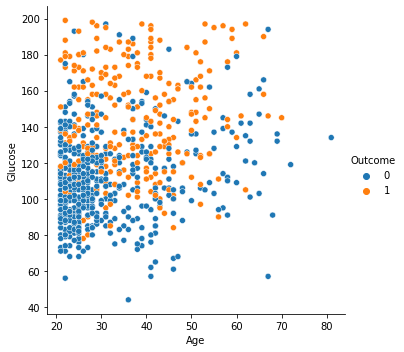

In [122]:
# STEP-4: Gözlemlemek amacıyla veri görselleştirme operasyonu; 

sns.relplot(data=df1,x="Age", y="Glucose", hue = "Outcome")

# Aşağısı gözlemlendiği vakit; Glukoz, Yaş aralığına ve hasta olan ve olmayanlara bakıldığında birçok yorum çıkarılabilir.
# Data Literacy yeteneğinize bağlı kalarak yorumda bulunabilirsiniz. 

## STEP-5: K-Nearest Neighbors Algoritması için ham verileri oluşturmak ve normalizasyon işlemi
---
* **5.Adımı anlamayanlar için:** Tercih etmiş olduğum algoritma K-En Yakın komuş algoritması bağımsız değişkenler üzerinde gruplandırma işlemi uygulayacaktır. (Pandas'taki groupBy metodu gibi düşünülebilir.) , Ham verileri bağımsız değişkenlerden oluşturduktan sonra normalizasyon işlemi uygulanacak: Güncelleme işlemi olarak düşünülebilir. Normalizasyon uygulanmadığı takdirde, yapay zeka modelimiz yanlış sonuçlar üretecektir. Normalizasyon sonucunda ortaya çıkan veriler ile modelin eğitilmesi için kullanılacaktır. 

In [123]:
ksy = df1.Outcome.values

In [126]:
# Remove dependent variable for master data (Ana/Ham veriler için bağımlı değişkeni kaldırmak)
master_data = df1.drop(["Outcome"], axis = 1)

In [128]:
# Normalization / Normalizasyon 
rez = (master_data - np.min(master_data)) / (np.max(master_data) - np.min(master_data))

In [145]:
# Gözlemlemek : 

print("Before normalization :")
print("--------------------------------------------------------------------")
print(master_data.head())
print("\n")
print("After Normalization :")
print("--------------------------------------------------------------------------")
print(rez.head())



Before normalization :
--------------------------------------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


After Normalization :
--------------------------------------------------------------------------
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.590164       0.353535  0.000000  0.500745   
1     0.05

----

## STEP-6: Train Data - Test Data Oluşturmak 
---
* **6.Adımı anlamayanlar için:** train_test_split fonksiyonun ilk parametresine normalize edilen verileri, ikinci parametreye df1.Outcome (hastalık durumunu) , üçüncü parametre ; test_size = 0.20 ise , test edilecek verinin miktarını belirtilmekte (%20 olacak biçimde) , son parametre ; random_state = True ise , verileri rastgele tercih etmek.  
* **Train data:** Modelin eğitilmesi için kullanılacak olan veriler
* **Test data:** Modelin test edilmesi için kullanılacak olan veriler 

In [202]:
t_train, t_test, k_train, k_test = train_test_split(rez,ksy, test_size = 0.5 , random_state = True)


## STEP-7: KNN Modeli Oluşturmak , Eğitmek , Test Etmek & Son Olarak Sonucu Gözlemlemek: (Result For K-Nearest Neighbors Algorithm)

---

In [204]:
KNN_Algorithm_Model = KNeighborsClassifier(n_neighbors = 7) # = k? ... En yakın komşular gözlemlenir. (Belirtilen sayı kadar...)
KNN_Algorithm_Model.fit(t_train, k_train) # Train data'lar ile K-NN Modelin eğitilmesi
hypothesis = KNN_Algorithm_Model.predict(t_test) # Prediction - Tahmin fonksiyonuna t_test verilerin girilmesi (%20'lik olan veriler)

print("Result For K-Nearest Neighbors : ", KNN_Algorithm_Model.score(t_test, k_test))

Result For K-Nearest Neighbors :  0.7591623036649214
